<a href="https://colab.research.google.com/github/CrucifierBladex/cifar10_convnet/blob/main/convnet_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers,models

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4110618100543703666, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5420832004143051767
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1706849589453702657
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14815666315706068158
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [3]:

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2),padding='same'))

model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2),padding='same'))

model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2),padding='same'))

model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2),padding='same'))

model.add(layers.GlobalAveragePooling2D())


model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10,activation='softmax'))



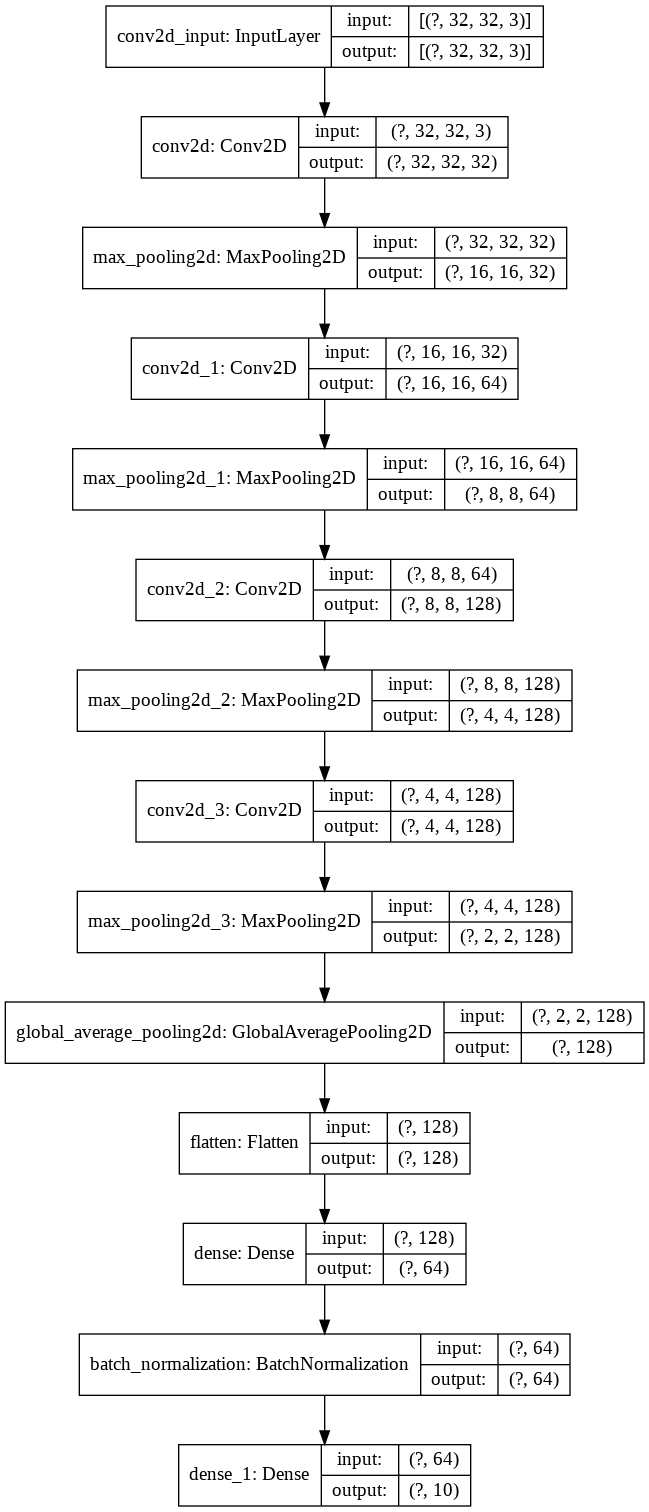

In [6]:
import keras
dot_img_file = '/content/sample_data/model/model_1.png'

keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)



In [7]:
from keras.datasets import cifar10
from keras.utils import to_categorical
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [8]:
train_images=train_images.reshape((50000,32,32,3))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,32,32,3))
test_images=test_images.astype('float32')/255



In [9]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [11]:
history=model.fit(train_images,train_labels,epochs=30,batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3163 - accuracy: 0.5332 - val_loss: 1.7575 - val_accuracy: 0.4922
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9177 - accuracy: 0.6795 - val_loss: 0.9004 - val_accuracy: 0.6824
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7800 - accuracy: 0.7310 - val_loss: 0.9221 - val_accuracy: 0.6910
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6874 - accuracy: 0.7626 - val_loss: 1.0760 - val_accuracy: 0.6419
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6146 - accuracy: 0.7860 - val_loss: 1.1463 - val_accuracy: 0.6217
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5560 - accuracy: 0.8081 - val_loss: 0.8385 - val_accuracy: 0.7290
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5040 - accuracy: 0.8273 - val_loss: 1.0864 - val_accuracy:

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

,loss,accuracy,val_loss,val_accuracy
0,1.316301,0.53322,1.757524,0.4922
1,0.917695,0.67952,0.900419,0.6824
2,0.780047,0.73098,0.922105,0.6910
3,0.687401,0.76260,1.075995,0.6419
4,0.614564,0.78602,1.146255,0.6217
5,0.556014,0.80810,0.838501,0.7290
6,0.504042,0.82732,1.086435,0.6842
7,0.451978,0.84282,0.978566,0.6967
8,0.406746,0.85712,0.792649,0.7473
9,0.369028,0.86978,0.888020,0.7431


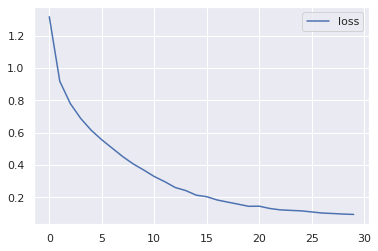

In [13]:
import pandas as pd
his=pd.DataFrame(history.history)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
his.plot(y='loss')
his

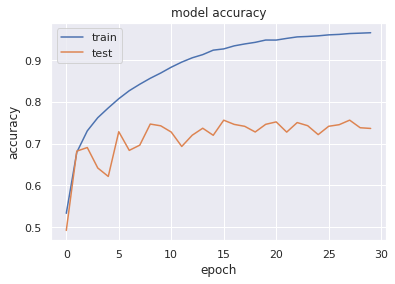

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

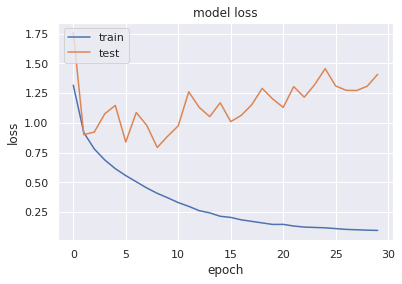

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

array([[1.1905031e-04, 1.9765369e-10, 6.6227318e-10, 7.6582253e-08,
        1.8609932e-06, 2.5826896e-09, 2.3977029e-06, 9.9987662e-01,
        2.0589308e-09, 3.5069497e-10]], dtype=float32)

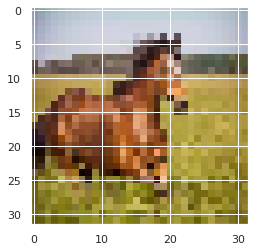

In [17]:
import imageio,cv2
import matplotlib.pyplot as plt
img=imageio.imread('/content/horse.jpeg')
img=cv2.resize(img,(32,32))
plt.imshow(img)
img=img.reshape(1,32,32,3)
img=img/255
model.predict(img)

In [18]:
import numpy as np

np.argmax(model.predict(img))

7

In [ ]:
model.save('cifar10class.h5')